In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as logreg


C:\Users\Shreya\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:

wc = pd.read_csv('D:/AI ML REPORT/World Cup 2019 Dataset.csv')

In [4]:
wc


,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current rank
0,England,A,11,0,3,5,1
1,South Africa,A,6,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4
5,Sri Lanka,A,11,1,3,4,9
6,Afghanistan,A,1,0,0,0,10
7,Australia,A,11,5,6,7,5
8,Bangladesh,A,5,0,0,0,7
9,India,A,11,2,3,6,2


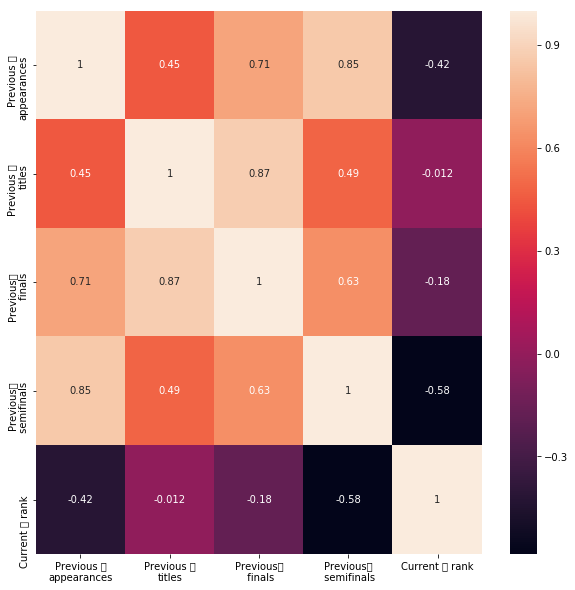

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#correlation between the explanatory and response variables.
correlation=wc.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)

In [122]:
#loaded the csv file containing the results of matches played between 2006 and 2017
result = pd.read_csv('D:/AI ML REPORT/resultswc.csv')
result

,Team1,Team2,Winner
0,West Indies,Pakistan,West Indies
1,Australia,Scotland,Australia
2,Bermuda,Sri Lanka,Sri Lanka
3,Ireland,Zimbabwe,no result
4,Netherlands,South Africa,South Africa
5,England,New Zealand,New Zealand
6,Bangladesh,India,Bangladesh
7,Ireland,Pakistan,Ireland
8,Australia,Netherlands,Australia
9,Canada,England,England


In [123]:
#function to calculate missing values in a dataset and respective missing value percentage
def missing_data(data):
    percentage_missing=data.isnull().sum()*100/len(data)
    data_types=data.dtypes
    missing_values=pd.DataFrame({"data_types":data_types,"pct_missing":percentage_missing})
    return missing_values

In [124]:
#checking missing values in a wc.csv file and respective missing value percentage
missing_data(wc)

,data_types,pct_missing
Team,object,0.0
Group,object,0.0
Previous \r\nappearances,int64,0.0
Previous \r\ntitles,int64,0.0
Previous\r\n finals,int64,0.0
Previous\r\n semifinals,int64,0.0
Current \r rank,int64,0.0


In [125]:
#checking missing values in a result.csv file and respective missing value percentage
missing_data(result)

,data_types,pct_missing
Team1,object,0.0
Team2,object,0.0
Winner,object,0.0


In [126]:
#displaying the match details of the teams playing in 2019 world cup
worldcupTeams = ['England', ' South Africa', 'West Indies', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
#checking the teams defined above is only present in the result dataset
df_team1 = result[result['Team1'].isin(worldcupTeams)]
df_team2 = result[result['Team2'].isin(worldcupTeams)]
#concat both teams
df_teams = pd.concat((df_team1, df_team2))
#drop duplicates
df_teams.drop_duplicates()
#count the rows/teams after concating and dropping
df_teams.count()

Team1     164
Team2     164
Winner    164
dtype: int64

In [127]:
#generating a new  Series with the index reset.This is useful when the index needs to be treated as a column
df_teams = df_teams.reset_index(drop=True)
#if team-1 won the match, assign it as label 1
df_teams.loc[df_teams.Winner == df_teams.Team1,'winningTeam']=1
#if team-2 won the match, assign it as label 2
df_teams.loc[df_teams.Winner == df_teams.Team2, 'winningTeam']=2
df_teams

,Team1,Team2,Winner,winningTeam
0,West Indies,Pakistan,West Indies,1.0
1,Australia,Scotland,Australia,1.0
2,England,New Zealand,New Zealand,2.0
3,Bangladesh,India,Bangladesh,1.0
4,Australia,Netherlands,Australia,1.0
5,West Indies,Zimbabwe,West Indies,1.0
6,Bangladesh,Sri Lanka,Sri Lanka,2.0
7,Pakistan,Zimbabwe,Pakistan,1.0
8,India,Sri Lanka,Sri Lanka,2.0
9,West Indies,Ireland,West Indies,1.0


In [128]:
#Removing column name-'winningTeam'
df_teams = df_teams.drop(['winningTeam'], axis=1)

df_teams

,Team1,Team2,Winner
0,West Indies,Pakistan,West Indies
1,Australia,Scotland,Australia
2,England,New Zealand,New Zealand
3,Bangladesh,India,Bangladesh
4,Australia,Netherlands,Australia
5,West Indies,Zimbabwe,West Indies
6,Bangladesh,Sri Lanka,Sri Lanka
7,Pakistan,Zimbabwe,Pakistan
8,India,Sri Lanka,Sri Lanka
9,West Indies,Ireland,West Indies


In [88]:
#converting team-1 and team-2 from categorical variables to continuous inputs
#It creates a new dataframe which consists of zeros and ones. 
#The dataframe will have a one depending on the team of a particular game in this case.
wc_past = pd.get_dummies(df_teams, prefix=['Team1', 'Team2'], columns=['Team1', 'Team2'])



In [89]:

wc_past.head()

,Winner,Team1_Afghanistan,Team1_Australia,Team1_Bangladesh,Team1_Bermuda,Team1_Canada,Team1_England,Team1_India,Team1_Ireland,Team1_Kenya,...,Team2_Kenya,Team2_Netherlands,Team2_New Zealand,Team2_Pakistan,Team2_Scotland,Team2_South Africa,Team2_Sri Lanka,Team2_United Arab Emirates,Team2_West Indies,Team2_Zimbabwe
0,West Indies,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Australia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,New Zealand,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Bangladesh,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Australia,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [90]:
#defining 'X' variable containing whole dataset except winner column
X = wc_past.drop(['Winner'], axis=1)
X.head()

,Team1_Afghanistan,Team1_Australia,Team1_Bangladesh,Team1_Bermuda,Team1_Canada,Team1_England,Team1_India,Team1_Ireland,Team1_Kenya,Team1_Netherlands,...,Team2_Kenya,Team2_Netherlands,Team2_New Zealand,Team2_Pakistan,Team2_Scotland,Team2_South Africa,Team2_Sri Lanka,Team2_United Arab Emirates,Team2_West Indies,Team2_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [91]:
#defining 'y' variable containing only winner column
y = wc_past["Winner"]
y.head()

0    West Indies
1      Australia
2    New Zealand
3     Bangladesh
4      Australia
Name: Winner, dtype: object

In [92]:
#dividing the training and testing dataset in 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [100]:
#import random forest classifier library
rf = RandomForestClassifier(n_estimators=100, max_depth=20,  random_state=0) 
#fitting a random forest classifier to our training set
rf.fit(X_train, y_train)
#calculating accuracy result of training and testing dataset
score1= rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
#printing the accuracy to 5 decimal points
print("Training set accuracy : ", '%.5f'%((score1)*100) ,"%")
print("Test set accuracy: ", '%.5f'%((score2)*100) ,"%")

Training set accuracy :  92.10526 %
Test set accuracy:  66.00000 %


In [101]:
#importing ranking csv file for giving priority to higher ranked team to win this year
ranking = pd.read_csv('D:/AI ML REPORT/icc_rankings.csv') 
ranking

,Position,Team,Points
0,1,England,125
1,2,India,121
2,3,South Africa,115
3,4,New Zealand,113
4,5,Australia,109
5,6,Pakistan,94
6,7,Bangladesh,90
7,8,West Indies,77
8,9,Sri Lanka,76
9,10,Afghanistan,63


In [102]:
#checking missing values in a ranking.csv file and respective missing value percentage
missing_data(ranking)

,data_types,pct_missing
Position,int64,0.0
Team,object,0.0
Points,int64,0.0


In [103]:
#importing fixtures csv file
fixtures = pd.read_csv('D:/AI ML REPORT/fixtures.csv')
fixtures


,Round Number,Date,Location,Team_1,Team_2,Group,Result
0,1,30/05/2019,"Kennington Oval, London",England,South Africa,Group A,NaN
1,1,31/05/2019,"Trent Bridge, Nottingham",West Indies,Pakistan,Group A,NaN
2,1,1/6/2019,"Sophia Gardens, Cardiff",New Zealand,Sri Lanka,Group A,NaN
3,1,1/6/2019,"County Ground, Bristol",Afghanistan,Australia,Group A,NaN
4,1,2/6/2019,"Kennington Oval, London",South Africa,Bangladesh,Group A,NaN
5,1,3/6/2019,"Trent Bridge, Nottingham",England,Pakistan,Group A,NaN
6,1,4/6/2019,"Sophia Gardens, Cardiff",Afghanistan,Sri Lanka,Group A,NaN
7,1,5/6/2019,"The Rose Bowl, Southampton",South Africa,India,Group A,NaN
8,1,5/6/2019,"Kennington Oval, London",Bangladesh,New Zealand,Group A,NaN
9,1,6/6/2019,"Trent Bridge, Nottingham",Australia,West Indies,Group A,NaN


In [104]:
#checking missing values in a fixtures.csv file and respective missing value percentage
missing_data(fixtures)

,data_types,pct_missing
Round Number,object,0.00
Date,object,0.00
Location,object,0.00
Team_1,object,0.00
Team_2,object,0.00
Group,object,6.25
Result,float64,100.00


In [105]:
#initializing a prediction dataset
pred_set = []

In [106]:
#adding new columns with ranking position for each team and slicing the dataset 
#for first 45 games since there are 45 league stage games in total
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Team_1,Team_2,Group,Result
40,1,1.0,4.0,3/7/2019,"Riverside Ground, Chester-le-Street",England,New Zealand,Group A,NaN
41,1,10.0,8.0,4/7/2019,"Headingley, Leeds",Afghanistan,West Indies,Group A,NaN
42,1,6.0,7.0,5/7/2019,"Lord's, London",Pakistan,Bangladesh,Group A,NaN
43,1,9.0,2.0,6/7/2019,"Headingley, Leeds",Sri Lanka,India,Group A,NaN
44,1,5.0,3.0,6/7/2019,"Emirates Old Trafford, Manchester",Australia,South Africa,Group A,NaN


In [107]:
#adding teams to new prediction dataset based on ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()


,Team_1,Team_2,winning_team
0,England,South Africa,None
1,Pakistan,West Indies,None
2,New Zealand,Sri Lanka,None
3,Australia,Afghanistan,None
4,South Africa,Bangladesh,None


In [108]:
#converting team-1 and team-2 from categorical variables to continuous inputs
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
#adding missing columns to prediction dataset 
missing_cols = set(wc_past.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[wc_past.columns]

#dropping winner column
pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team1_Afghanistan,Team1_Australia,Team1_Bangladesh,Team1_Bermuda,Team1_Canada,Team1_England,Team1_India,Team1_Ireland,Team1_Kenya,Team1_Netherlands,...,Team2_Kenya,Team2_Netherlands,Team2_New Zealand,Team2_Pakistan,Team2_Scotland,Team2_South Africa,Team2_Sri Lanka,Team2_United Arab Emirates,Team2_West Indies,Team2_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#displaying the results for each and every league stage match
predictions = rf.predict(pred_set)
for i in range(fixtures.shape[0]):
    print("Match between : "+backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

Match between : South Africa and England
Winner: England

Match between : West Indies and Pakistan
Winner: Pakistan

Match between : Sri Lanka and New Zealand
Winner: New Zealand

Match between : Afghanistan and Australia
Winner: Australia

Match between : Bangladesh and South Africa
Winner: South Africa

Match between : Pakistan and England
Winner: England

Match between : Afghanistan and Sri Lanka
Winner: Sri Lanka

Match between : South Africa and India
Winner: India

Match between : Bangladesh and New Zealand
Winner: New Zealand

Match between : West Indies and Australia
Winner: Australia

Match between : Sri Lanka and Pakistan
Winner: Pakistan

Match between : Bangladesh and England
Winner: England

Match between : Afghanistan and New Zealand
Winner: New Zealand

Match between : Australia and India
Winner: India

Match between : West Indies and South Africa
Winner: South Africa

Match between : Sri Lanka and Bangladesh
Winner: Bangladesh

Match between : Pakistan and Australia
Win

In [110]:
#defining semi-finals team
semi = [('New Zealand', 'India'),
            ('England', 'South Africa')]

In [111]:
def predict(matches, ranking, final, logreg):

    # initializing of auxiliary list for data cleaning
    positions = []

    #retrieving team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches
    while i < len(positions):
        dict1 = {}

        # if position of first team is better than the second team then this team will be the 'Team_1' team and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Converting list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Getting dummy variables and dropping winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Adding missing columns compared to the model's training dataset
    missing_cols2 = set(wc_past.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[wc_past.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    
    #fitting the data in logistic regression
    logreg.fit(X_train, y_train)
    # Predict the outcome
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [112]:
ranking = pd.read_csv('D:/AI ML REPORT/icc_rankings.csv')

In [113]:
#predicting semi-finals result according to past matches results
predict(semi, ranking, wc_past, rf)

New Zealand and India
Winner: India

South Africa and England
Winner: England



In [114]:
#defining finals teams
finals = [('India', 'England')]

In [115]:
#predicting finals result according to past matches results
predict(finals, ranking, wc_past, rf)

India and England
Winner: England

